## 데이터셋 불러오기

In [180]:
import pandas as pd

#데이터 불러오기
df = pd.read_csv('./dataset/Mall_Customers.csv')

In [181]:
#데이터 확인
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [182]:
#데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 데이터셋 탐색 및 전처리

In [183]:
#고객 아이디는 분석에 필요 없으므로 삭제
df = df.drop('CustomerID', axis=1)

In [184]:
#중복데이터 확인
df.duplicated().sum()

0

In [185]:
#데이터프레임의 통계 정보 확인
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### 결측치 처리

In [186]:
#데이터프레임의 전체 결측값 개수 확인
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 이상치 탐지 및 제거

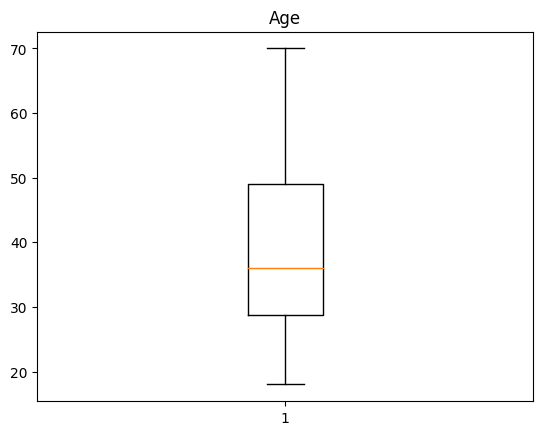

In [187]:
import matplotlib.pyplot as plt

#나이 컬럼 박스플롯으로 이상치 시각화
plt.boxplot(df['Age'])
plt.title('Age')
plt.show()

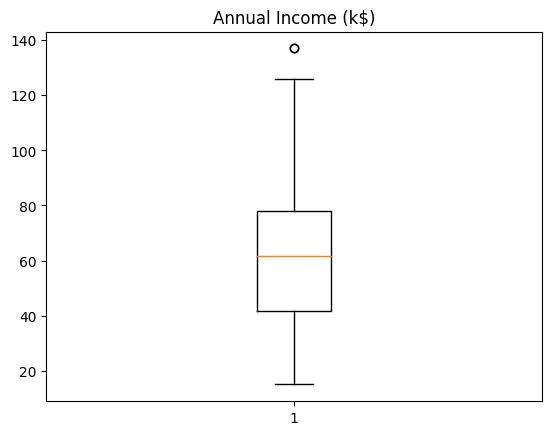

In [188]:
#연간 소득 컬럼 박스플롯으로 이상치 시각화
plt.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

In [189]:
#Annual Income의 이상치 탐지
df[df['Annual Income (k$)'] > 120]


,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


In [190]:
#Annual Income의 이상치 제거
df = df[df['Annual Income (k$)'] < 130]

In [191]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
193,Female,38,113,91
194,Female,47,120,16
195,Female,35,120,79
196,Female,45,126,28


### 데이터 시각화

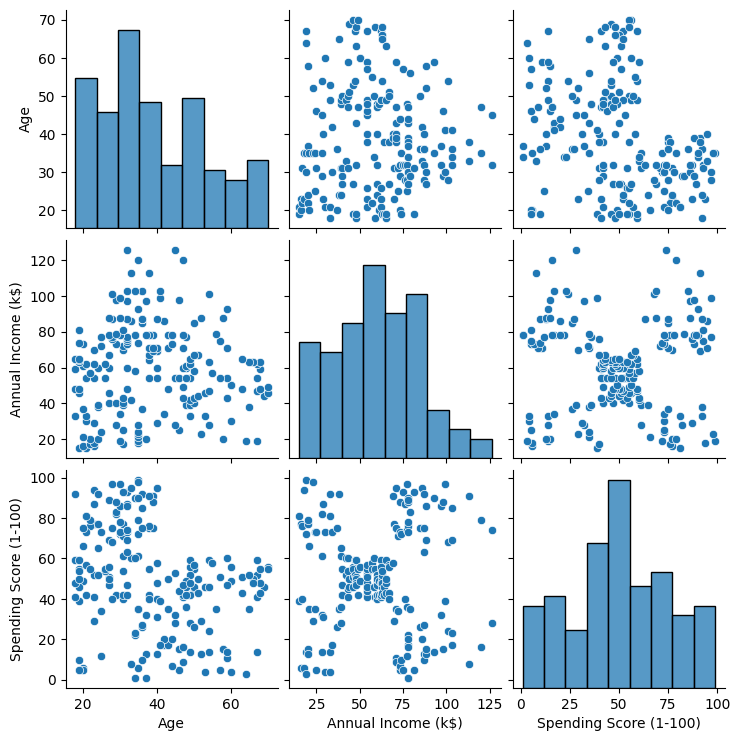

In [192]:
#전체 feature간 관계 시각화
import seaborn as sns

sns.pairplot(df)
#feature간의 산점도 출력
#같은 데이터가 만나는 대각선 영역에는 히스토그램 출력

<Axes: xlabel='Age', ylabel='Count'>

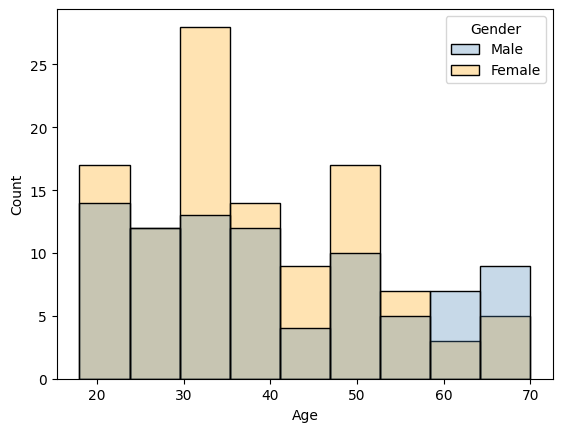

In [193]:
#나이와 성별을 같이 히스토그램으로 시각화하기 -> 30대 여성들이 많이 분포, 6~70대는 남성이 많음 
sns.histplot(data=df,x='Age',hue='Gender',palette=['steelblue','orange'],alpha=0.3)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

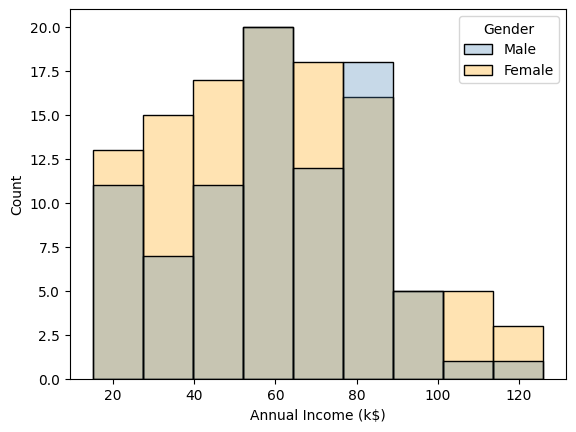

In [194]:
#연간 소득과 성별을 같이 히스토그램으로 시각화하기 -> 연간 소득이 80k$대에서만 남성이 여성보다 많음
sns.histplot(data=df,x='Annual Income (k$)',hue='Gender',palette=['steelblue','orange'],alpha=0.3)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

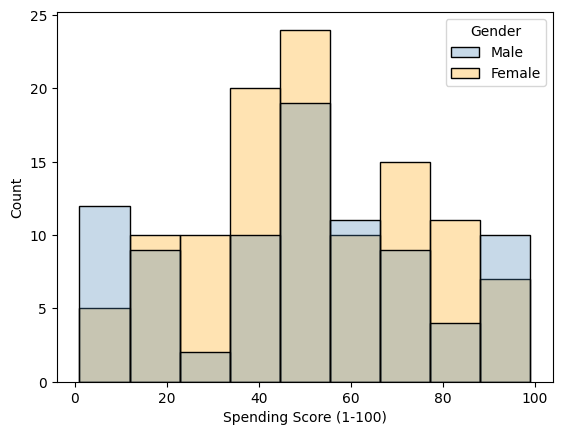

In [195]:
#점수와 성별을 같이 히스토그램으로 시각화하기 -> 대체로 여성의 점수가 높음
sns.histplot(data=df,x='Spending Score (1-100)',hue='Gender',palette=['steelblue','orange'],alpha=0.3)

### feature 스케일링

In [196]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [197]:
from sklearn.preprocessing import LabelEncoder

#Gender 컬럼 라벨 인코딩
encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])

In [198]:
#인코딩 확인
df.head()
#male은 1, female은 0으로 인코딩 됨

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [199]:
from sklearn.preprocessing import StandardScaler

#표준화를 적용 할 컬럼 선택
scale_df = df.drop('Gender',axis=1)
scale_col = scale_df.columns

# 데이터 표준화
scaler = StandardScaler()

scale_df[scale_col] = scaler.fit_transform(scale_df[scale_col])

In [200]:
scale_df['Gender'] = df['Gender']

In [201]:
#표준화 확인
scale_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.425414,-1.779171,-0.435989,1
1,-1.282367,-1.779171,1.199413,1
2,-1.353890,-1.739447,-1.720949,0
3,-1.139319,-1.739447,1.043661,0
4,-0.567131,-1.699723,-0.397051,0


## 클러스터링 기법 적용

### K-Means Clustering

#### 최적의 클러스터 수 찾기 - 엘보우 방법

In [202]:
from sklearn.cluster import KMeans

inertia_val = []          #결과 비교를 위한 리스트
range_num = range(2,13)

for k in range_num:       #k 값을 2부터 13까지 대입
  kmeans = KMeans(n_clusters=k, random_state=42)    #클러스터 수는 k로 설정하고 KMeans 모델 생성
  kmeans.fit(scale_df)    #모델 학습
  inertia_val.append(kmeans.inertia_)     

c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a

In [203]:
print(inertia_val)

[433.779840204505, 341.13469044934595, 251.12066507316683, 212.62461366035146, 176.2328058673652, 159.17734823663267, 145.35313973497838, 135.19313655749377, 123.9027170273167, 114.72427316539022, 106.52065743312252]


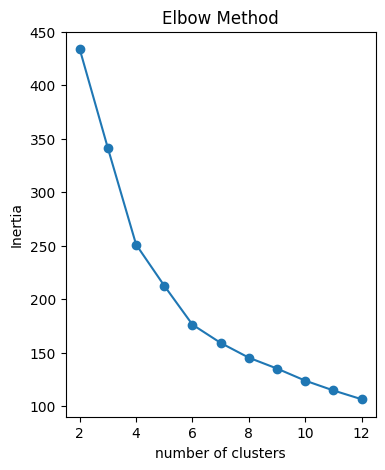

In [204]:
#엘보우 그래프 그리기
plt.figure(figsize=(4, 5))          #그래프 크기 지정
plt.plot(range_num, inertia_val, marker='o')        #x축, y축 지정
plt.xlabel('number of clusters')    #x축 제목 표시
plt.ylabel('Inertia')               #y축 제목 표시
plt.title('Elbow Method')           #그래프 제목 표시
plt.show()

엘보우 방법으로 확인했을 때, k=4 또는 6일 경우가 최적의 클러스터 수가 될 수 있음

#### 최적의 클러스터 수 찾기 - 실루엣 점수

In [205]:
from sklearn.metrics import silhouette_score

sil_scores = []         #실루엣 함수 비교를 위한 리스트

for i in range_num:
    #KMeans 모델 생성 및 학습
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(scale_df) 

    score = silhouette_score(scale_df, labels)      #실루엣 점수 계산
    sil_scores.append(score)

c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a

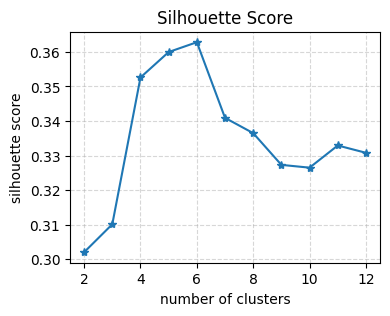

In [206]:
plt.figure(figsize=(4,3))
plt.plot(range_num, sil_scores, marker='*')
plt.xlabel("number of clusters")
plt.ylabel('silhouette score')
plt.title("Silhouette Score")
plt.grid(True, alpha=0.5, linestyle='--')       #그리드 표시
plt.show()

실루엣 점수 결과 k=6이 최적의 클러스터 수임을 보여줌

#### 모델 생성 및 학습

In [207]:
scale_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.425414,-1.779171,-0.435989,1
1,-1.282367,-1.779171,1.199413,1
2,-1.353890,-1.739447,-1.720949,0
3,-1.139319,-1.739447,1.043661,0
4,-0.567131,-1.699723,-0.397051,0
...,...,...,...,...
193,-0.066466,2.113819,1.588795,0
194,0.577246,2.391890,-1.331567,0
195,-0.281037,2.391890,1.121537,0
196,0.434198,2.630236,-0.864309,0


In [208]:
#k=6로 모델 생성 및 학습
kmeans = KMeans(n_clusters= 6, random_state=42)
kmeans.fit(scale_df)
scale_df['Cluster'] = kmeans.labels_

c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### 클러스터링 결과 시각화

In [209]:
def plt_scatterplot():
    #2차원으로 군집 시각화 (연령 vs 소득)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=scale_df['Age'], y=scale_df['Annual Income (k$)'], hue=scale_df['Cluster'], palette='Spectral')
    plt.title('KMeans (Age vs Annual Income)')
    plt.show()

    #소득 vs 지출 점수 시각화
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=scale_df['Annual Income (k$)'], y=scale_df['Spending Score (1-100)'], hue=scale_df['Cluster'], palette='Spectral')
    plt.title('KMeans (Annual Income vs Spending Score)')
    plt.show()

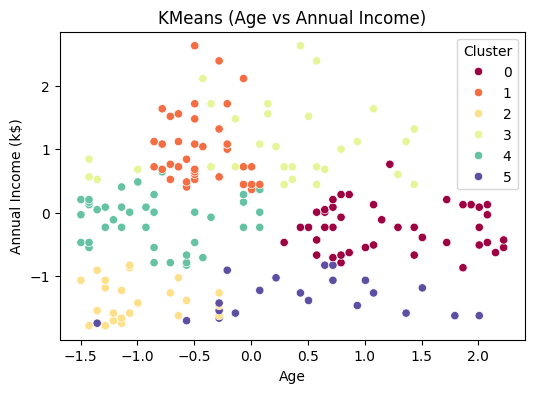

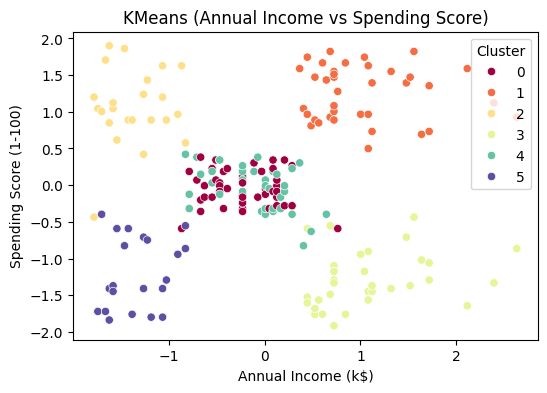

In [210]:
plt_scatterplot()

#### k=5일 경우도 실행해보기

In [211]:
#k=5로 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scale_df)
scale_df['Cluster'] = kmeans.labels_

c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mung\anaconda3\envs\spartaa\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


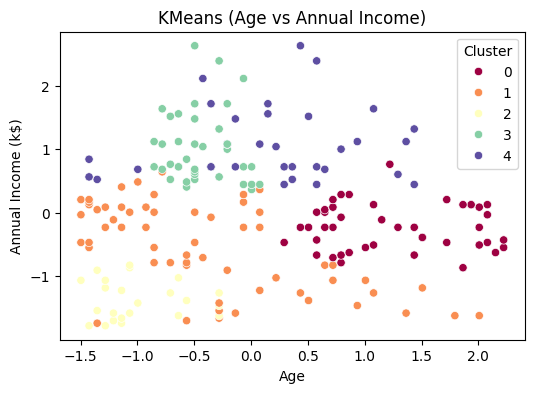

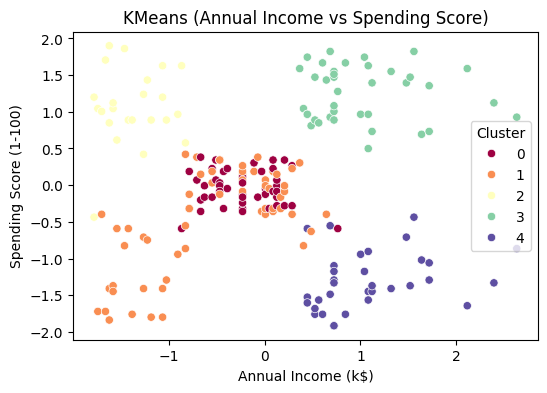

In [212]:
plt_scatterplot()

### 계층적 군집화

In [213]:
scale_df = scale_df.drop('Cluster', axis=1)
scale_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.425414,-1.779171,-0.435989,1
1,-1.282367,-1.779171,1.199413,1
2,-1.353890,-1.739447,-1.720949,0
3,-1.139319,-1.739447,1.043661,0
4,-0.567131,-1.699723,-0.397051,0
...,...,...,...,...
193,-0.066466,2.113819,1.588795,0
194,0.577246,2.391890,-1.331567,0
195,-0.281037,2.391890,1.121537,0
196,0.434198,2.630236,-0.864309,0


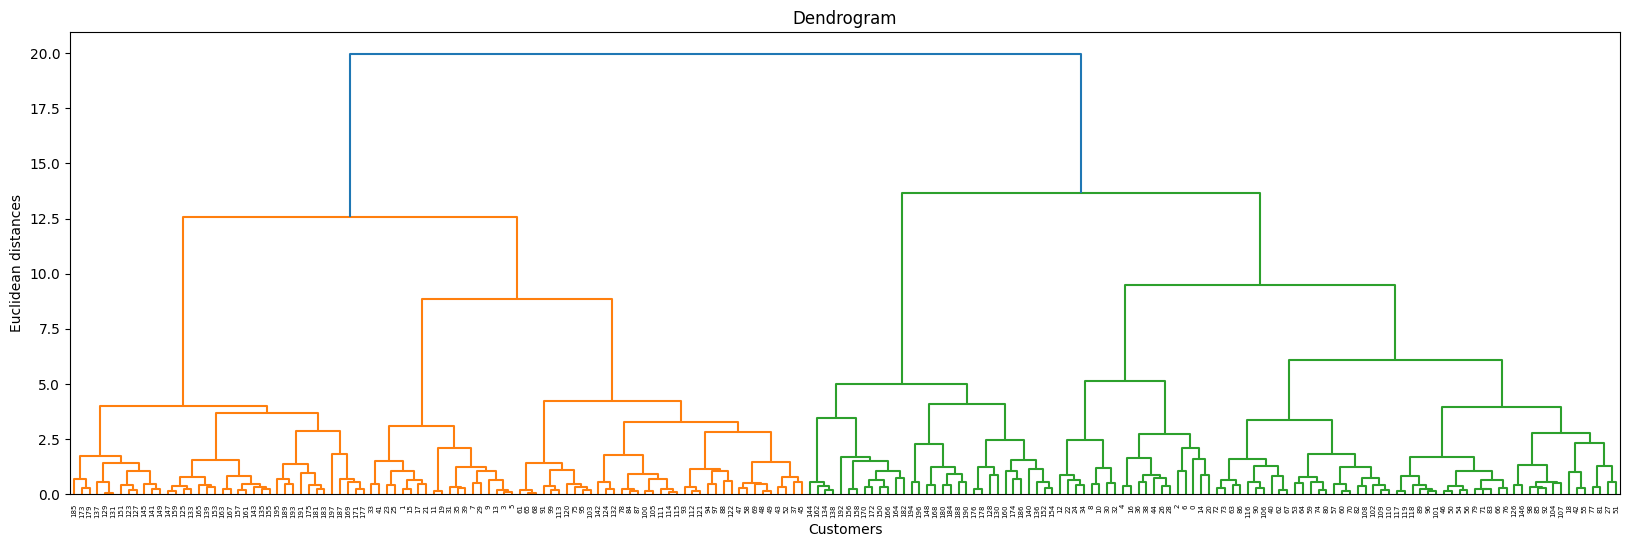

In [214]:
import scipy.cluster.hierarchy as sch

# 덴드로그램 생성
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(scale_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

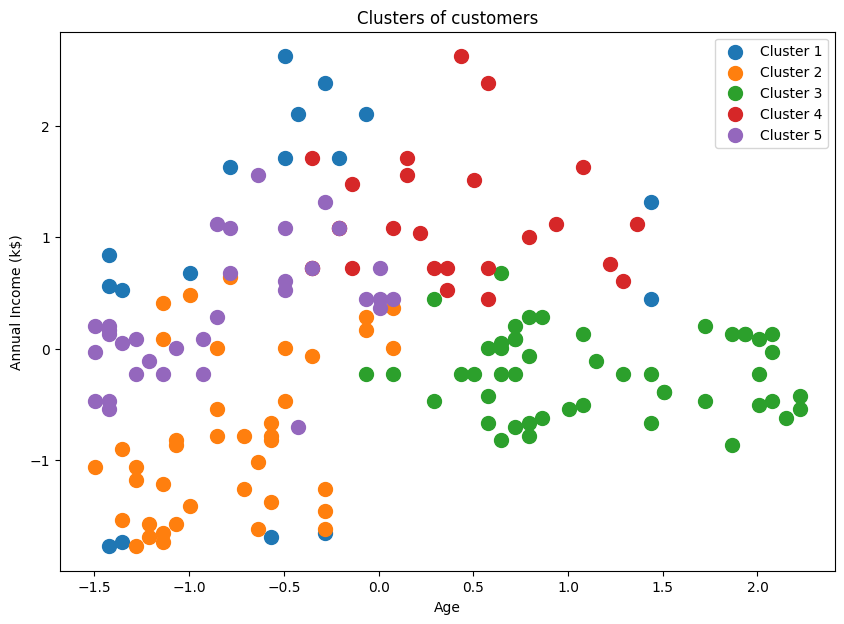

In [221]:
from sklearn.cluster import AgglomerativeClustering

# 계층적 군집화 모델 생성
hc = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')

# scale_df를 넘파이 배열로 변환 (필요한 경우)
data_array = scale_df.to_numpy()

# 모델 학습 및 예측
y_hc = hc.fit_predict(data_array)

# 결과 시각화
plt.figure(figsize=(10, 7))

# 각 클러스터를 색깔과 함께 시각화
for cluster in range(5):  # n_clusters = 5
    plt.scatter(
        data_array[y_hc == cluster, 0], 
        data_array[y_hc == cluster, 1], 
        s=100, 
        label=f'Cluster {cluster + 1}'
    )

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [216]:
# 실루엣 점수 계산
silhouette_avg = silhouette_score(scale_df, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3185035662534499


### DBSCAN

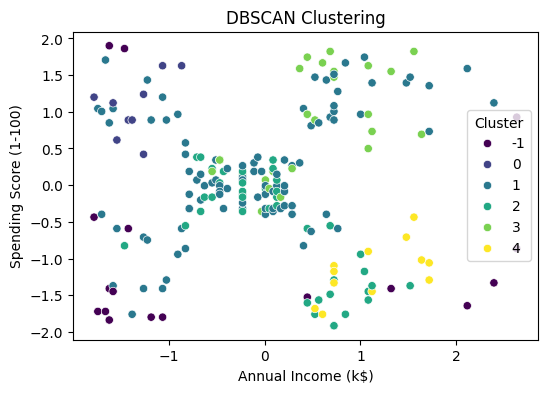

In [217]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=5)           #DBSCAN 모델 생성, epsilon과 최소 샘플 개수 설정

scale_df['Cluster'] = dbscan.fit_predict(scale_df)     #모델 학습 및 예측

#클러스터링 결과 시각화
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=scale_df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

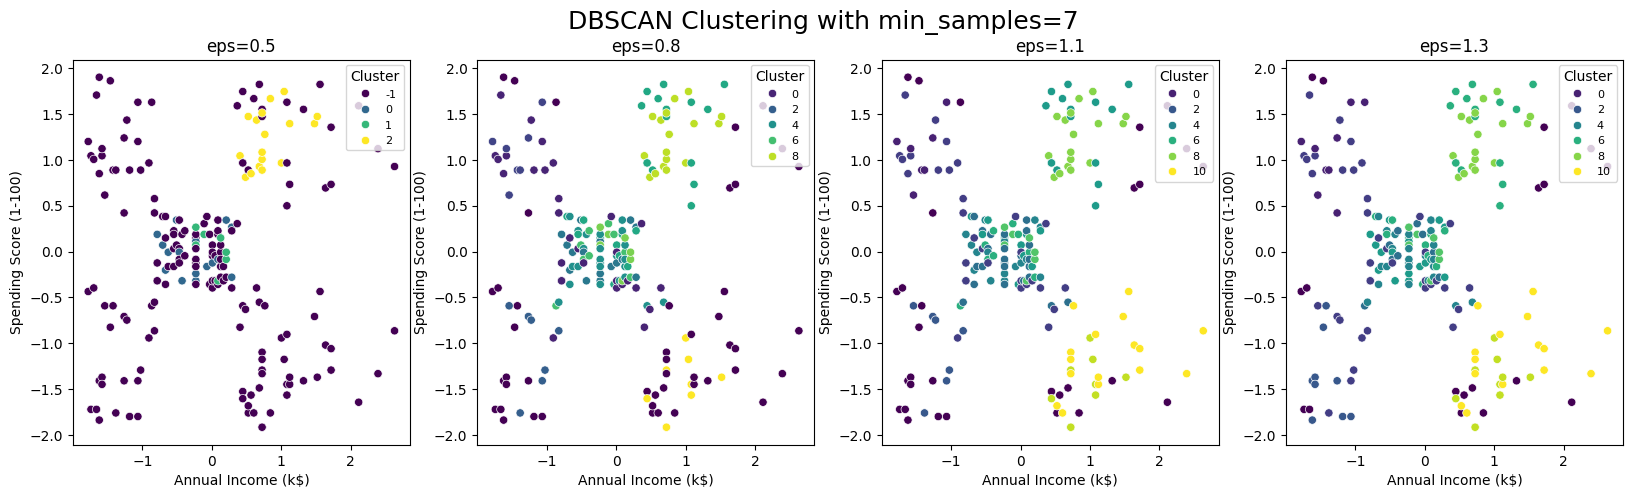

In [218]:
#DBSCAN 매개변수 설정
eps_values = [0.5, 0.8, 1.1, 1.3]
min_samples = 7  # min_samples 고정

#플롯 설정
fig, axes = plt.subplots(1, len(eps_values), figsize=(20, 5))
plt.suptitle('DBSCAN Clustering with min_samples=7', size=18)

for i, eps in enumerate(eps_values):
    #DBSCAN 모델 생성 및 예측
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    scale_df['Cluster'] = dbscan.fit_predict(scale_df)

    #현재 서브플롯 선택
    ax = axes[i]
    sns.scatterplot(
        x='Annual Income (k$)', 
        y='Spending Score (1-100)', 
        hue='Cluster', 
        data=scale_df, 
        palette='viridis', 
        ax=ax
    )
    #제목, 축, 범례 표시
    ax.set_title(f'eps={eps}', fontsize=12)
    ax.legend(title='Cluster', loc='upper right', fontsize=8)
    ax.set_xlabel('Annual Income (k$)', fontsize=10)
    ax.set_ylabel('Spending Score (1-100)', fontsize=10)

plt.show()


eps=0.5:클러스터 수가 적어 잘 분류되지 않음   
eps=0.8: 클러스터 수가 적당해 분류는 됨   
eps=1.1: 적당한 클러스터 수 클러스터 간 분리가 적당히 잘 되어 보임   
eps=1.3: 1.1보다 0군의 분포가 잘 안보임    